In [1]:
pip install librosa 


Note: you may need to restart the kernel to use updated packages.


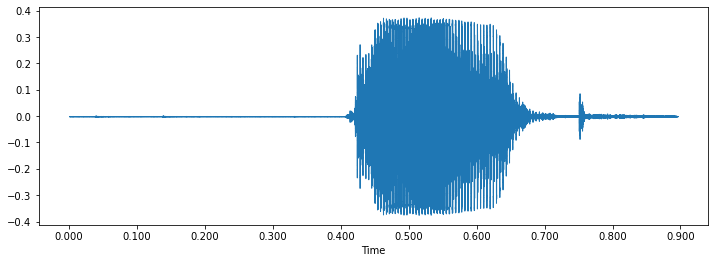

In [1]:
import librosa
import librosa.display
# The sampling rate is nothing but samples taken per second, 
# and by default, librosa samples the file at a sampling rate of 22050;
import matplotlib.pyplot as plt 
data, sampling_rate = librosa.load('Input/Train/audio2/dog/0ab3b47d_nohash_0.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

In [2]:
sampling_rate

22050

In [5]:
data

array([-1.8136378e-04, -1.9632357e-04, -7.2652052e-05, ...,
       -8.7933819e-05, -1.1472726e-05,  0.0000000e+00], dtype=float32)

In [27]:
import librosa
import librosa.display
data, sampling_rate = librosa.load('Input/Train/audio2/bird/00b01445_nohash_0.wav')
print("Data :", data)
print("Len Data :", len(data))
print("Sampling_rate : ", sampling_rate)
print()
data, sampling_rate = librosa.load('Input/Train/audio2/bird/00b01445_nohash_0.wav',sr=None)
print("Data :", data)
print("Len Data :", len(data))
print("Sampling_rate : ", sampling_rate)
print()
data, sampling_rate = librosa.load('Input/Train/audio2/bird/00b01445_nohash_0.wav',sr=8000)
print("Data :", data)
print("Len Data :", len(data))
print("Sampling_rate : ", sampling_rate)
print()

Data : [-0.00725391  0.03054545  0.05361976 ... -0.01395112 -0.00720851
 -0.00082682]
Len Data : 22050
Sampling_rate :  22050

Data : [-0.00750732  0.04653931  0.02041626 ... -0.01004028 -0.01300049
 -0.00250244]
Len Data : 16000
Sampling_rate :  16000

Data : [ 0.01405776  0.01287521 -0.02004913 ...  0.00315916 -0.00046633
 -0.01092998]
Len Data : 8000
Sampling_rate :  8000



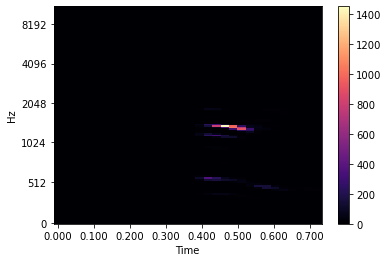

In [28]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
data, sampling_rate = librosa.load('Input/Train/audio2/bird/00b01445_nohash_0.wav',sr=None)
melspec = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
plt.figure()
librosa.display.specshow(melspec, y_axis='mel', x_axis='time')
plt.colorbar()

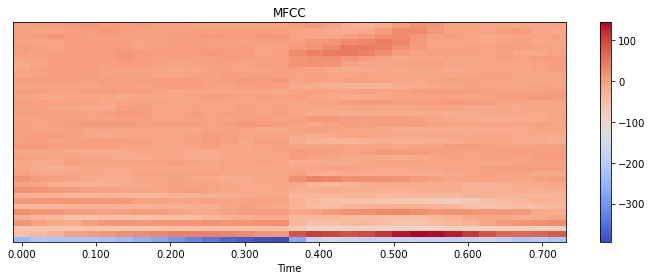

In [34]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
data, sampling_rate = librosa.load('Input/Train/audio2/bird/00b01445_nohash_0.wav',sr=None)
mfcc = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.title("MFCC")
plt.colorbar()
plt.tight_layout()
plt.show()

# Wave Plotting using matplotlib

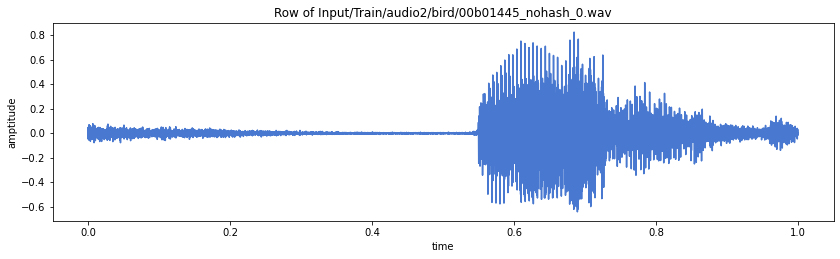

In [36]:
import librosa # for audio processing
import matplotlib.pyplot as plt
import numpy as np
samples, sample_rate = librosa.load('Input/Train/audio2/bird/00b01445_nohash_0.wav',sr=16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title("Row of " + 'Input/Train/audio2/bird/00b01445_nohash_0.wav')
ax1.set_xlabel("time")
ax1.set_ylabel("amptitude")
ax1.plot(np.linspace(0,sample_rate/len(samples),sample_rate),samples)

# Model Summary

In [54]:
import os
import librosa
import numpy as np
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
train_audio_path = 'Input/Train/audio2/'
labels=os.listdir(train_audio_path)
all_wave = []
all_label = []
for label in labels :
    print(label)
    #print('\n')
    waves = [f for f in os.listdir(train_audio_path + '/' + label) if f.endswith('.wav')]
    #print(waves)
    #print('\n')
    for wav in waves :
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr=16000)
        samples = librosa.resample(samples, sample_rate, 16000)
        all_wave.append(samples)
        all_label.append(label)
le = LabelEncoder()
y = le.fit_transform(all_label)
classes = list(le.classes_)
from keras.utils import np_utils
y=np_utils.to_categorical(y,num_classes=len(labels))
all_wave = np.array(all_wave).reshape((-1,16000,1))
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave), np.array(y), stratify=y, test_size= 0.22, random_state=777,shuffle=True)
K.clear_session()
inputs = Input(shape=(16000,1))
#First Conv1D Layer
conv = Conv1D(8,13,padding='valid',activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)
#Second Conv1D Layer
conv = Conv1D(16,11,padding='valid',activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)
#Third Conv1D Layer
conv = Conv1D(32,9,padding='valid',activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)
#Fourth Conv1D Layer
conv = Conv1D(64,7,padding='valid',activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)
#Flatten Layer
conv = Flatten()(conv)
#Dense Layer 1
conv = Dense(256,activation="relu")(conv)
conv = Dropout(0.3)(conv)
#Dense Layer 2
conv = Dense(128,activation="relu")(conv)
conv = Dropout(0.3)(conv)
outputs = Dense(len(labels), activation='softmax')(conv)
model = Model(inputs,outputs)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10,min_delta=0.0001)
mc = ModelCheckpoint('best_model2.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit(x_tr, y_tr, epochs=100, callbacks=[es, mc], bach_size=32, valiadtion_data = (x_val,y_val))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()



bed


<ipython-input-54-5fc1e82f9326>:22: FutureWarning: Pass orig_sr=16000, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples = librosa.resample(samples, sample_rate, 16000)


bird
cat
dog
down
eight


<ipython-input-54-5fc1e82f9326>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_wave = np.array(all_wave).reshape((-1,16000,1))


ValueError: cannot reshape array of size 11634 into shape (16000,1)